In [5]:
%load_ext autoreload
%autoreload 2
import os
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from tqdm import tqdm
import pandas as pd
import sys
from IPython.display import display, HTML
from typing import List
import numpy as np
import matplotlib
import imodelsx.util
from copy import deepcopy
import re
# import notebook_helper
import sasc.viz
import scipy.special
import pandas as pd
from sasc.config import RESULTS_DIR
timings_module = __import__('03_timings')
setting = "default"
EXPT_NAMES = [
    k
    for k in os.listdir(join(RESULTS_DIR, "stories", setting))
    if "uts03" in k or "uts01" in k
]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
n_skipped = 0
n_processed = 0
for EXPT_NAME in EXPT_NAMES:
    EXPT_DIR = join(RESULTS_DIR, 'stories', setting, EXPT_NAME)
    timings_file = join(EXPT_DIR, 'timings.csv')
    if not os.path.exists(timings_file):
        print('skipping', EXPT_NAME)
        n_skipped += 1
        continue
    # if os.path.exists(join(EXPT_DIR, 'timings_processed.csv')):
        # print('already processed', EXPT_NAME)
        # n_processed += 1
        
    print('processing', EXPT_NAME)

    df = pd.read_csv(timings_file)
    print('shape', df.shape)
    try:
        df = timings_module.process_timings(df)
        df.to_csv(join(EXPT_DIR, 'timings_processed.csv'), index=False)
        n_processed += 1
    except Exception as e:
        print('error', e)
        print('skipping', EXPT_NAME)
        n_skipped += 1
        continue
print('n_skipped', n_skipped, 'n_processed', n_processed)

skipping uts01___jun14___seed=5
processing uts01___jun14___seed=2
shape (3191, 3)
n 3191 n_nan 265
skipping uts01___jun14___seed=1
skipping uts03___jun14___seed=2
skipping uts01___jun14___seed=4
skipping uts01___jun14___seed=7
skipping uts03___jun14___seed=6
skipping uts01___jun14___seed=6
processing uts03___jun14___seed=7
shape (3249, 3)
n 3249 n_nan 256
skipping uts03___jun14___seed=5
processing uts03___jun14___seed=3
shape (2290, 3)
n 2290 n_nan 164
skipping uts03___jun14___seed=1
processing uts01___jun14___seed=3
shape (2542, 3)
n 2542 n_nan 221
skipping uts03___jun14___seed=4
n_skipped 10 n_processed 4


/home/chansingh/automated-explanations/notebooks_stories/1_generate/03_timings.py:185: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["timing"][~idxs] = m.predict(X[~idxs])
/home/chansingh/automated-explanations/notebooks_stories/1_generate/03_timings.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timing'][idxs] = m.predict(X[idxs])
/home/chansingh/automated-explanations/notebooks_stories/1_generate/03_timings.py:185: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

# Visualize

In [7]:
df = pd.read_csv(join(RESULTS_DIR, 'stories', 'default', 'uts01___jun14___seed=3', 'timings_processed.csv'))

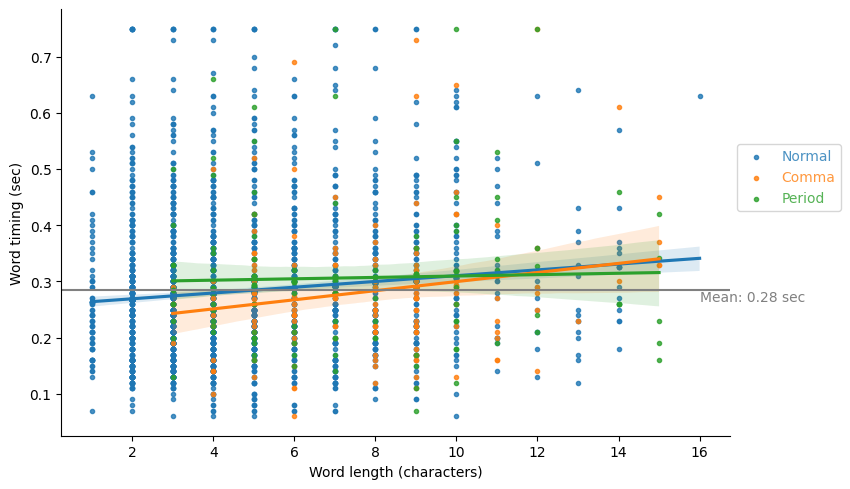

In [8]:
df['ends_in'] = 'Normal'
df.loc[df['ends_in_period'], 'ends_in'] = 'Period'
df.loc[df['ends_in_comma'], 'ends_in'] = 'Comma'
# df = df.sort_values(by='ends_in')

sns.lmplot(data=df, x='word_len', y='timing', hue='ends_in', markers='.', legend=False, aspect=1.5)
plt.xlabel('Word length (characters)')
plt.ylabel('Word timing (sec)')
plt.axhline(np.mean(df['timing']), color='gray')
plt.text(16, np.mean(df['timing']) - 0.02, f'Mean: {np.mean(df["timing"]):.2f} sec', color='gray')
# change legend label value
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(bbox_to_anchor=(1, 0.7), labelcolor='linecolor')
# plt.gca().legend(handles=handles, labels=['Does not end in period', 'Ends in period'], bbox_to_anchor=(1, 0.7))
plt.show()